# OnlineMedEd Thought Challenge
### Khosrow Naderi
---

Dealing with a dataset of users' trial data, we are interested in understanding users' engagement and access.

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [3]:
# import the dataset
raw_data = pd.read_csv('OME_challenge_data.csv')
data = raw_data.copy()
data.head()

,video_pre_trial,note_during_trial,video_during_trial,question_during_trial,flashcard_during_trial,total_mins_during_trial,n_days_active_during_trial,churn_trial,video_after_trial
0,5,39,39,38,49,1541,18,0,239
1,8,4,3,6,0,257,8,0,12
2,16,32,11,5,60,418,6,0,53
3,0,8,8,39,2,557,7,0,44
4,47,25,31,106,189,1901,21,0,70


Taking a quick look at the data:

In [4]:
# a quick look at the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42251 entries, 0 to 42250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   video_pre_trial             42251 non-null  int64
 1   note_during_trial           42251 non-null  int64
 2   video_during_trial          42251 non-null  int64
 3   question_during_trial       42251 non-null  int64
 4   flashcard_during_trial      42251 non-null  int64
 5   total_mins_during_trial     42251 non-null  int64
 6   n_days_active_during_trial  42251 non-null  int64
 7   churn_trial                 42251 non-null  int64
 8   video_after_trial           42251 non-null  int64
dtypes: int64(9)
memory usage: 2.9 MB


All features are integers with no nulls - a clean dataset!

In [5]:
# a quick statistical overview
data.describe()

,video_pre_trial,note_during_trial,video_during_trial,question_during_trial,flashcard_during_trial,total_mins_during_trial,n_days_active_during_trial,churn_trial,video_after_trial
count,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000
mean,22.820620,8.992403,19.506355,45.979101,23.822395,579.599749,7.097939,0.421552,33.734373
std,46.600109,25.021713,29.032720,125.491115,123.484251,1081.684550,6.411821,0.493813,53.276295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,9.000000,1.000000,0.000000,167.000000,5.000000,0.000000,8.000000
75%,21.000000,9.000000,25.000000,32.000000,2.000000,666.000000,10.000000,1.000000,44.000000
max,517.000000,536.000000,403.000000,1776.000000,5429.000000,22534.000000,32.000000,1.000000,522.000000


It provides a sense of data variance for each feature.<br><br>
We can look at it better using Histograms:

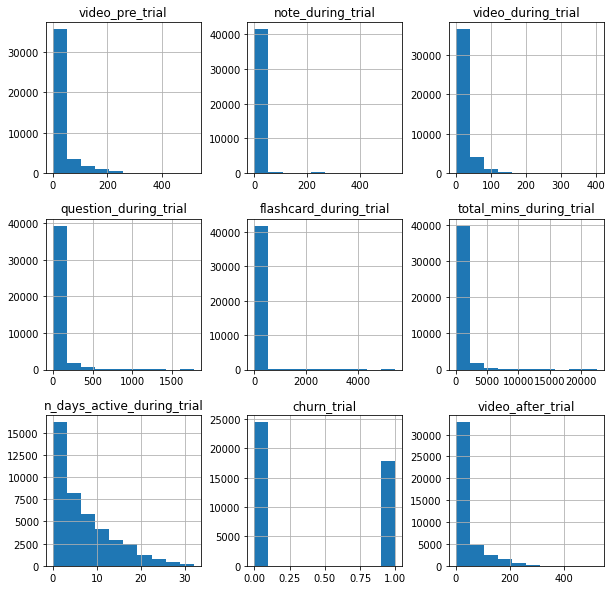

In [6]:
# Histograms
data.hist(figsize=(10,10))
plt.show()

Histograms show how most features (except churn which is binary) have a skewed distribution. This makes sense as most users use lower resources.<br><br>Let's look at the box plot as well to see the distribution from another viewpoint.

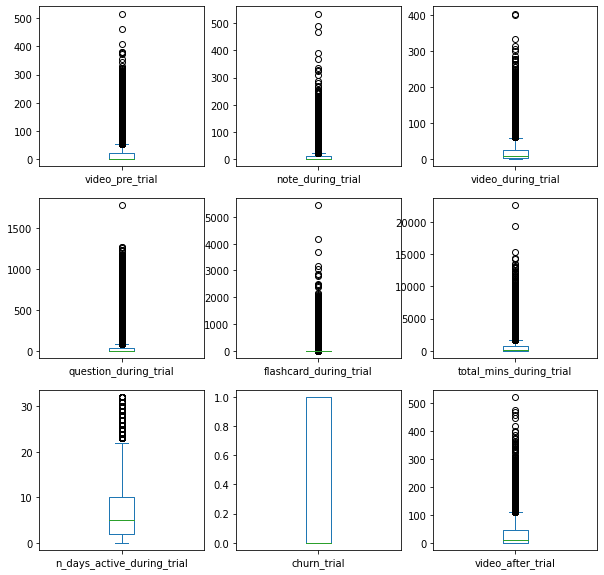

In [7]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

Similarly, box plots show that most features have low median and quantiles due to the high concentration of users at low values. The exceptions are active days which shows a wider distribution and churn which is a binary feature for which box plot doesn't have a specific meaning.  

### Q1: Exposure to Premium Modalities

The first thing is to add a feature indicating if anyone has used premium modalities. 

In [8]:
# list the features
cols = data.columns
cols

Index(['video_pre_trial', 'note_during_trial', 'video_during_trial',
       'question_during_trial', 'flashcard_during_trial',
       'total_mins_during_trial', 'n_days_active_during_trial', 'churn_trial',
       'video_after_trial'],
      dtype='object')

In [9]:
# define premium modalities 
prem_mod = [cols[i] for i in [1,3,4]]
prem_mod

['note_during_trial', 'question_during_trial', 'flashcard_during_trial']

In [10]:
# keep original database in case we need it later on
data_original = data.copy()
# define premium feature
data['premium'] = 0
premium_condition = data[prem_mod[0]] + data[prem_mod[1]] + data[prem_mod[2]] > 0
data.loc[premium_condition, 'premium'] = 1
data.head()

,video_pre_trial,note_during_trial,video_during_trial,question_during_trial,flashcard_during_trial,total_mins_during_trial,n_days_active_during_trial,churn_trial,video_after_trial,premium
0,5,39,39,38,49,1541,18,0,239,1
1,8,4,3,6,0,257,8,0,12,1
2,16,32,11,5,60,418,6,0,53,1
3,0,8,8,39,2,557,7,0,44,1
4,47,25,31,106,189,1901,21,0,70,1


In [11]:
# calculate the ratio of premium users
prem_users = data.premium.sum()
all_users = data.shape[0]
print("{0:.1f}".format(round(prem_users/all_users,3)*100), '% of users are premium users.')

77.6 % of users are premium users.


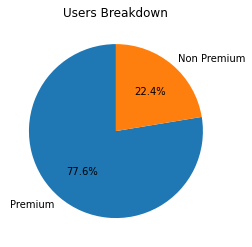

In [12]:
# pie plot 
y = [prem_users/all_users, 1 - prem_users/all_users]
plt.pie(y, labels=("Premium","Non Premium"), autopct='%1.1f%%', startangle=90)
plt.title("Users Breakdown")
plt.show() 

77.6% of all users have used at least one of the premium modalities. <br>
Let's look at the usage more closely.

58.0 % of all users used notes.
2.1 % of note users used notes heavily.


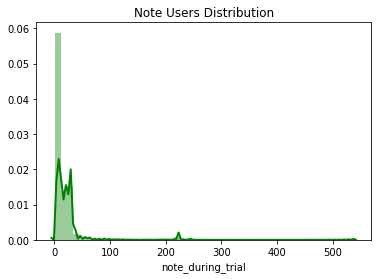

In [13]:
# Density Plot and Histogram of users using notes
# all users' use of notes (could be 0: not used)
notes = data[prem_mod[0]]
# users using notes
notes1 = notes[notes > 0]
# the ratio
print("{0:.1f}".format(round(len(notes1)/len(notes),3)*100), '% of all users used notes.')
# graphs
sns.distplot(notes1, hist=True, kde=True, 
             bins=int(50), color = 'green',
             kde_kws={'linewidth': 2}).set_title('Note Users Distribution')
# checking high users
print("{0:.1f}".format(round(len(notes1[notes1 > 100])/len(notes1),3)*100), '% of note users used notes heavily.')

58% of users used notes, and the density plot shows that most of such users used it less than 50 times while a small number of note users (2%) used it heavily (more than 100 notes). 

52.4 % of all users used questions.
8.8 % of question users used questions heavily.


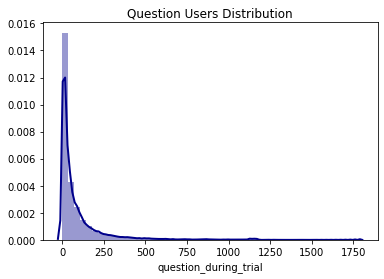

In [14]:
# Density Plot and Histogram of users using questions
# all users' use of questions (could be 0: not used)
questions = data[prem_mod[1]]
# users using questions
questions1 = questions[questions > 0]
# the ratio
print("{0:.1f}".format(round(len(questions1)/len(questions),3)*100), '% of all users used questions.')
# graphs
sns.distplot(questions1, hist=True, kde=True, 
             bins=int(50), color = 'darkblue',
             kde_kws={'linewidth': 2}).set_title('Question Users Distribution')
# checking high users
print("{0:.1f}".format(round(len(questions1[questions1 > 250])/len(questions1),3)*100), '% of question users used questions heavily.')

52% of users used questions, and the density plot shows that most of such users used it less than 250 times while a fraction of question users (9%) used it heavily (more than 250 questions). 

29.6 % of all users used flashcards.
1.1 % of flashcard users used flashcards heavily.


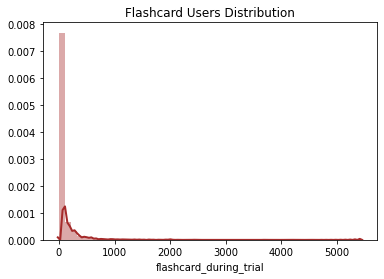

In [15]:
# Density Plot and Histogram of users using flashcards
# all users' use of flashcards (could be 0: not used)
flashcards = data[prem_mod[2]]
# users using questions
flashcards1 = flashcards[flashcards > 0]
# the ratio
print("{0:.1f}".format(round(len(flashcards1)/len(flashcards),3)*100), '% of all users used flashcards.')
# graphs
sns.distplot(flashcards1, hist=True, kde=True, 
             bins=int(50), color = 'brown',
             kde_kws={'linewidth': 2}).set_title('Flashcard Users Distribution')
# checking high users
print("{0:.1f}".format(round(len(flashcards1[flashcards1 > 1000])/len(flashcards1),3)*100), '% of flashcard users used flashcards heavily.')

30% of users used flashcards, and the density plot shows that most of such users used it less than 500 times while a low percentage of flashcard users (1%) used it heavily (more than 1000 flashcards).<br><br>
In conclusion, these results could be satisfactory depending on business metrics definitions and expectations. The overall exposure of premium modalities looks great as it has engaged more than **three quarters of all users** (having used one or more premium modalities). More than **half of the users** have used notes and questions but less than a third of all users have used flashcards. This shows among users taking advantage of premium modalities, notes and questions were more popular. 

### Q2: Product Highlights and Improvements

Let's look at the correlation between each pair of the features. 

In [16]:
# Correlation between different variables
corr = data.corr()
corr

,video_pre_trial,note_during_trial,video_during_trial,question_during_trial,flashcard_during_trial,total_mins_during_trial,n_days_active_during_trial,churn_trial,video_after_trial,premium
video_pre_trial,1.000000,-0.029052,-0.000883,0.068405,0.077128,0.124314,0.041264,0.013808,-0.062049,-0.002806
note_during_trial,-0.029052,1.000000,0.139514,0.082819,0.071914,0.149325,0.206055,0.094060,0.111130,0.193073
video_during_trial,-0.000883,0.139514,1.000000,0.346566,0.222034,0.607103,0.678942,0.039403,0.145521,0.157460
question_during_trial,0.068405,0.082819,0.346566,1.000000,0.289640,0.511101,0.505235,0.044432,0.038137,0.196838
flashcard_during_trial,0.077128,0.071914,0.222034,0.289640,1.000000,0.271675,0.294453,0.014688,0.039041,0.103642
total_mins_during_trial,0.124314,0.149325,0.607103,0.511101,0.271675,1.000000,0.649389,0.029235,0.126609,0.177786
n_days_active_during_trial,0.041264,0.206055,0.678942,0.505235,0.294453,0.649389,1.000000,0.040984,0.250092,0.332378
churn_trial,0.013808,0.094060,0.039403,0.044432,0.014688,0.029235,0.040984,1.000000,-0.087924,0.055776
video_after_trial,-0.062049,0.111130,0.145521,0.038137,0.039041,0.126609,0.250092,-0.087924,1.000000,0.111240
premium,-0.002806,0.193073,0.157460,0.196838,0.103642,0.177786,0.332378,0.055776,0.111240,1.000000


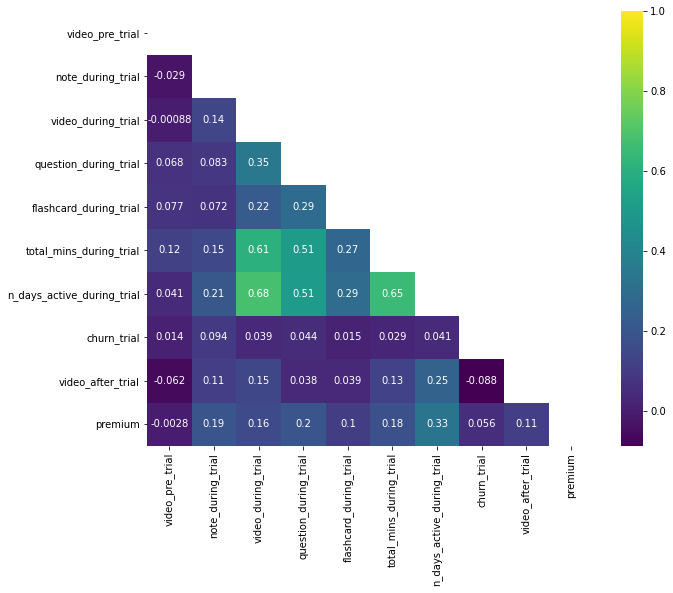

In [17]:
# Heatmap construction
# generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# draw the heatmap
plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, mask = mask, cmap="viridis")

The heatmap shows the highest correlations are among active days, trial videos and total minutes during trial. <br><br> Let's look at them on a scatter plot.

In [18]:
# retrieving features
for i, col in enumerate(cols):
    print(i, col)

0 video_pre_trial
1 note_during_trial
2 video_during_trial
3 question_during_trial
4 flashcard_during_trial
5 total_mins_during_trial
6 n_days_active_during_trial
7 churn_trial
8 video_after_trial


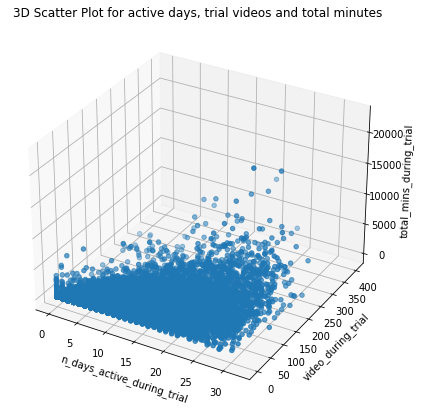

In [19]:
# 3D scatter plot for active days, trial videos and total minutes
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[cols[6]],data[cols[2]],data[cols[5]])
ax.set_title('3D Scatter Plot for active days, trial videos and total minutes')
ax.set_xlabel(cols[6])
ax.set_ylabel(cols[2])
ax.set_zlabel(cols[5])
plt.show()

Since the 3D graph is very congested it may make sense to show the data on 2D scatter plots. <br>
First, let's look at the trial videos and total minutes versus active days.

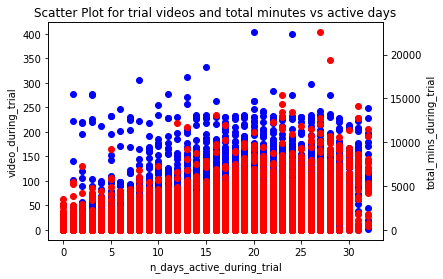

In [20]:
# 2D Scatter plots for trial videos and total minutes versus active days
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(data[cols[6]], data[cols[2]], color="blue")
ax2.scatter(data[cols[6]], data[cols[5]], color="red" )
ax1.set_title('Scatter Plot for trial videos and total minutes vs active days')
ax1.set_xlabel(cols[6])
ax1.set_ylabel(cols[2])
ax2.set_ylabel(cols[5])
plt.show()

Still the graph is not easy to interpret as for each number of days there are a wide range of users using videos and spending minutes. Therefore, showing all users is not helpful so a better metric is to look at the averages of these usages grouped by number of says.

In [21]:
# grouping data by number of active days and calculating averages for each feature 
data_group = data.groupby(by=cols[6], as_index=False).mean()
data_group.head()

,n_days_active_during_trial,video_pre_trial,note_during_trial,video_during_trial,question_during_trial,flashcard_during_trial,total_mins_during_trial,churn_trial,video_after_trial,premium
0,0,22.211353,0.000000,0.000000,0.000000,0.000000,30.971417,0.313205,14.334944,0.000000
1,1,18.073506,5.269759,1.810883,3.108653,1.212667,31.045317,0.436753,15.198037,0.608207
2,2,20.083123,5.103559,4.382090,7.489323,2.492767,81.210103,0.396785,20.533180,0.721470
3,3,21.948267,6.550933,6.988800,11.477067,3.864533,146.346400,0.411200,26.145333,0.790667
4,4,20.969984,6.607583,9.390837,15.304581,6.212638,222.040126,0.407583,28.692575,0.816430


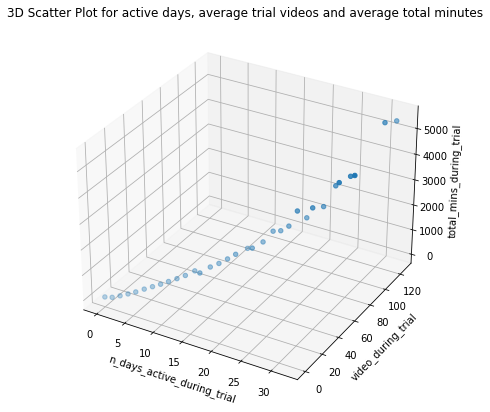

In [22]:
# 3D scatter plot for active days, average trial videos and average total minutes
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_group[cols[6]],data_group[cols[2]],data_group[cols[5]])
ax.set_title('3D Scatter Plot for active days, average trial videos and average total minutes')
ax.set_xlabel(cols[6])
ax.set_ylabel(cols[2])
ax.set_zlabel(cols[5])
plt.show()

Now some correlation can be seen. <br> Let's look at 2D plot.

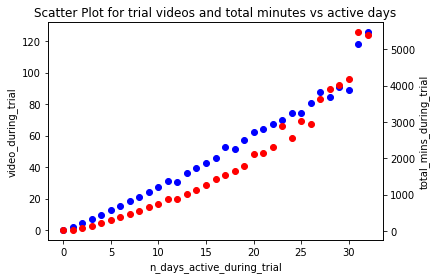

In [23]:
# 2D Scatter plots for average trial videos and average total minutes versus active days
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(data_group[cols[6]], data_group[cols[2]], color="blue")
ax2.scatter(data_group[cols[6]], data_group[cols[5]], color="red" )
ax1.set_title('Scatter Plot for trial videos and total minutes vs active days')
ax1.set_xlabel(cols[6])
ax1.set_ylabel(cols[2])
ax2.set_ylabel(cols[5])
plt.show()

The correlation between trial videos and total minutes with active days is better visible now.<br>Let's look at the correlation between videos and minutes as well.

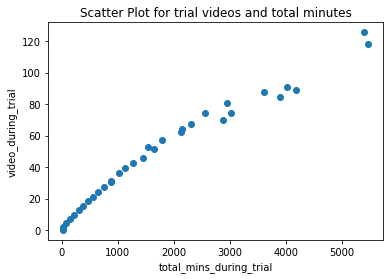

In [24]:
# 2D Scatter plot for average trial videos versus average total minutes
plt.scatter(data_group[cols[5]], data_group[cols[2]])
plt.title('Scatter Plot for trial videos and total minutes')
plt.xlabel(cols[5])
plt.ylabel(cols[2])
plt.show()

So as expected the more users spend time in the system the more videos they watch.<br>
Similarly, more premium modalities is accessed the more time users spend on the website.

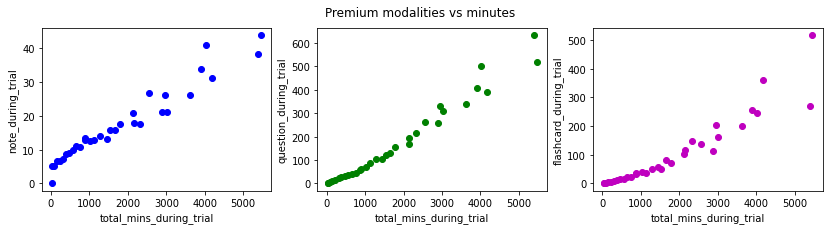

In [25]:
# 2D Scatter plots for average premium modalities verus average total minutes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,3))
fig.suptitle('Premium modalities vs minutes')

plt.subplot(1,3,1)
ax1.scatter(data_group[cols[5]], data_group[cols[1]], color='b')
plt.xlabel(cols[5])
plt.ylabel(cols[1])

plt.subplot(1,3,2)
ax2.scatter(data_group[cols[5]], data_group[cols[3]], color='g')
plt.xlabel(cols[5])
plt.ylabel(cols[3])

plt.subplot(1,3,3)
ax3.scatter(data_group[cols[5]], data_group[cols[4]], color='m')
plt.xlabel(cols[5])
plt.ylabel(cols[4])

plt.show()

Higher total usage indicated by minutes means higher usage of premium modalities as well. However as obvious in the graphs above, notes are more dominantly used as (a) even at low minutes there is a considerable usage of notes, and (b) there is a larger slope meaning higher usage of notes compared to questions and flashcards at similar minutes.
<br><br>
Another interesting area to look at could be the video consumption since we have data from before and after trial. To understand how the video usage has changed, we define four categories based on how video usage pre and post trial stand compared to during trial.

In [26]:
# Define metrics; Hi: higher, Lo: lower
HiHi = data[(data[cols[0]]>data[cols[2]]) & (data[cols[8]]>data[cols[2]])].shape[0]
LoLo = data[(data[cols[0]]<data[cols[2]]) & (data[cols[8]]<data[cols[2]])].shape[0]
HiLo = data[(data[cols[0]]>data[cols[2]]) & (data[cols[8]]<data[cols[2]])].shape[0]
LoHi = data[(data[cols[0]]<data[cols[2]]) & (data[cols[8]]>data[cols[2]])].shape[0]

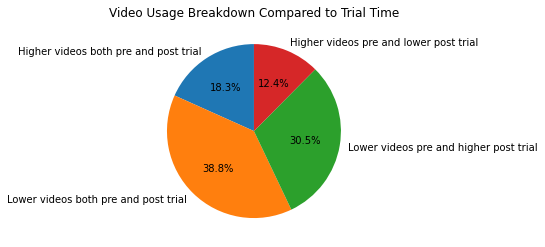

In [27]:
# Pie plot
y = [HiHi/all_users, LoLo/all_users, LoHi/all_users, HiLo/all_users]
plt.pie(y, labels=("Higher videos both pre and post trial","Lower videos both pre and post trial",
                  "Lower videos pre and higher post trial", "Higher videos pre and lower post trial"), 
                    autopct='%1.1f%%', startangle=90)
plt.title("Video Usage Breakdown Compared to Trial Time")
plt.show() 

We are mostly interested in the green: users that kept using more videos during and after trial. They make up 30% of all users. The red section is of concern as less videos are used during and after trial, which is 12% of users. More data can help strategize ways to reduce red and improve green. Let's see if premium usage has anything to do with this.

In [28]:
print("Ratio of Premium Usage among HiHi:", 
      "{0:.2f}".format(data[(data[cols[0]]>data[cols[2]]) & (data[cols[8]]>data[cols[2]]) & (data['premium']>0)].shape[0]/HiHi))
print("Ratio of Premium Usage among LoLo:", 
      "{0:.2f}".format(data[(data[cols[0]]<data[cols[2]]) & (data[cols[8]]<data[cols[2]]) & (data['premium']>0)].shape[0]/LoLo))
print("Ratio of Premium Usage among HiLo:", 
      "{0:.2f}".format(data[(data[cols[0]]>data[cols[2]]) & (data[cols[8]]<data[cols[2]]) & (data['premium']>0)].shape[0]/HiLo))
print("Ratio of Premium Usage among LoHi:", 
      "{0:.2f}".format(data[(data[cols[0]]<data[cols[2]]) & (data[cols[8]]>data[cols[2]]) & (data['premium']>0)].shape[0]/LoHi))

Ratio of Premium Usage among HiHi: 0.76
Ratio of Premium Usage among LoLo: 0.81
Ratio of Premium Usage among HiLo: 0.79
Ratio of Premium Usage among LoHi: 0.85


Looks like the category of interest (green or LoHi) has higher usage of premium (85%) than others. So one strategy could be encouraging users to use more premium modalities which also engages them with more videos.
<br><br>
In conclusion, 
- The more time users spend on the website during trial, the more they navigate different features. 
- Notes were used more often than other premium modalities. 
- Less than a third of users watched more videos during and after trial, 85% of whom used premium modalities.    
- Using strategies to keep users engaged is important to the business. Providing options for users could enhance their usage. For example, notes stand out and could be rolled out in a limited edition to all users to engage them with premium features. This will also help increase the video consumption.   


### Q3: Relationship between Trial Usage and Churn

First, let's look at the premium usage and how much they have churned.

In [29]:
# define the premium-churned users
prem_churn = ((data['premium'] == 1) & (data['churn_trial'] == 1)).sum()
print("{0:.1f}".format(round(prem_churn/prem_users,3)*100),'% of premium users have churned.')

43.6 % of premium users have churned.


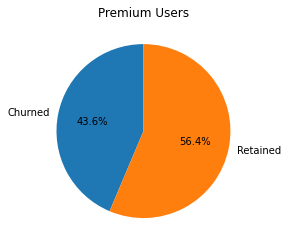

In [30]:
# pie plot
y = [prem_churn/prem_users, 1 - prem_churn/prem_users]
plt.pie(y, labels=("Churned","Retained"), autopct='%1.1f%%', startangle=90)
plt.title("Premium Users")
plt.show() 

More than half of the premium users have retained. Let's see a breakdown of each premium modality.

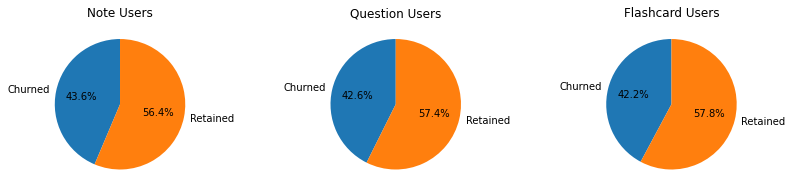

In [31]:
# pie plots for premium modalities who churned/retained
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,3))

plt.subplot(1,3,1)
ax1.pie([data[data[cols[1]]>0]['churn_trial'].sum()/data[data[cols[1]]>0].shape[0], 
        1-data[data[cols[1]]>0]['churn_trial'].sum()/data[data[cols[1]]>0].shape[0]],
        labels=("Churned","Retained"), autopct='%1.1f%%', startangle=90)
ax1.set_title('Note Users')

plt.subplot(1,3,2)
ax2.pie([data[data[cols[3]]>0]['churn_trial'].sum()/data[data[cols[3]]>0].shape[0],
        1-data[data[cols[3]]>0]['churn_trial'].sum()/data[data[cols[3]]>0].shape[0]],
        labels=("Churned","Retained"), autopct='%1.1f%%', startangle=90)
ax2.set_title('Question Users')


plt.subplot(1,3,3)
ax3.pie([data[data[cols[4]]>0]['churn_trial'].sum()/data[data[cols[4]]>0].shape[0],
        1-data[data[cols[4]]>0]['churn_trial'].sum()/data[data[cols[4]]>0].shape[0]],
        labels=("Churned","Retained"), autopct='%1.1f%%', startangle=90)
ax3.set_title('Flashcard Users')


plt.show()

All three premium modalities have led to similar churn rates. <br><br>How about videos?

In [34]:
# define users who have used more videos during trial 
higher_video_trial = data[(data[cols[0]] < data[cols[2]])]
print("{0:.1f}".format(round(higher_video_trial['churn_trial'].sum()/higher_video_trial.shape[0],3)*100),
      "% of users who used more videos during trial than before, churned.") 

41.9 % of users who used more videos during trial than before, churned.


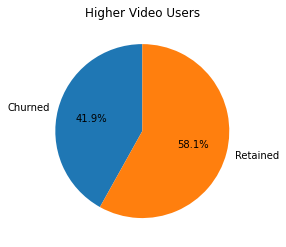

In [33]:
# pie plot
y = [higher_video_trial['churn_trial'].sum()/higher_video_trial.shape[0], 
     1 - higher_video_trial['churn_trial'].sum()/higher_video_trial.shape[0]]
plt.pie(y, labels=("Churned","Retained"), autopct='%1.1f%%', startangle=90)
plt.title("Higher Video Users")
plt.show() 

Similarly, users who have watched more videos during the trial than before give a similar churn rate.<br><br> In conclusion, more than half of the users who have used premium modalities or more videos than pre trial have retained. Depending on the business metrics this could be acceptable. Since churn is a binary class, the next step in this study could be modeling the behavior using classification methods such as Logistic Regression to understand and predict future trials. 

### Q4: Additional Data for Further Evaluation

- The data from video usage provided an understanding of the behavior before and after trial. If possible, similar data for other features from before and after trial could be helpful to understand the users consumption and behavior better. 
- Testing new features one at a time could be helpful to isolate the effects of any feature by rolling out that single feature to randomly selected users and design an A/B test to evaluate the results and effect of that feature.
- Another type of useful data could be including join date for users, especially if in sync with releasing new features so that retention rates for each group of users could be calculated in a cohort analysis.


### Q5: Benefiting Departments

- It is likely that such analysis is done within Data Analytics department, but the main department that could benefit from these results is the Product department which can take the analysis findings and extract meaningful insights which could help the product design and modification. The results could shed light on the users reaction to new features, and their usage of individual features as well as bundle modalities.
- The next department that could find this analysis helpful is the Content department. Together with Product department they can figure out which type of content has made the positive or negative impacts and consequently enhance the content quality.
- Marketing department could also use these results on how to approach the subscribers and engage them better using the highlighted findings. In cooperation with Finance department and higher management they can evaluate the return for each feature or approach within the business development framework, and define the scopes that need more focus.
- Any change or modification in product, content or marketing campaigns would generate new data that could be used in return by the analyst (me, in this case!) in the Data Analytics department to perform additional analysis and provide feedback to each department on how their approaches are affecting the customer engagement and the business growth. The analyst can also support their process by helping the design and analysis of the A/B tests, evaluation metrics, and useful data collection. 


Thank you for your time!